In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
# Creting Dataset (M1, M2 and R)
m1 = []
m2 = []
r = []
for i in range(1000):
    # Smaller Object
    m1.append(np.random.randint(1, 100))
    # Bigger Object
    m2.append(np.random.randint(5000, 10000))
    # Radius between Objects
    r.append(np.random.randint(1, 1000) / 10)

In [3]:
# Generating Equation
gravitation_constant = 0.667
force = []
for i in range(1000):
    f = gravitation_constant * m1[i] * m2[i] / (r[i] ** 2)
    force.append(round(f, 3))

(0, 60000.0)

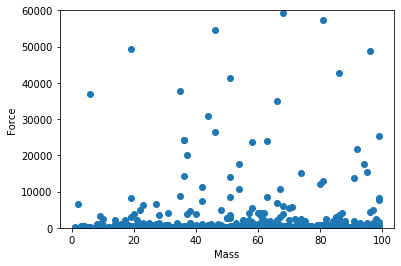

In [4]:
# Visualizing Scatter plot for Outliers
plt.scatter(m1, force)
#plt.scatter(m2, force)
plt.xlabel("Mass")
plt.ylabel("Force")
plt.ylim(0, 6e4)

In [5]:
# Creating Dataframe
df = pd.DataFrame({"m1": m1, "m2": m2, "r": r, "F": force})

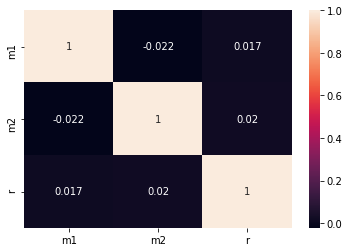

In [6]:
# Visualizing Correlations
sns.heatmap(df.iloc[:, :-1].corr(), annot=True)

In [7]:
# Removing Outliers and Saving the Dataset to .csv
to_rem = df[df["F"] > 6e4].index.values.tolist()
df.drop(to_rem, inplace=True)

#df.to_csv("gravitation.csv")

In [8]:
# Fitting a Model
est = RandomForestRegressor()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
est.fit(X, y)
print(est.feature_importances_)

[0.09078136 0.05795724 0.8512614 ]


Text(0.5, 0.98, "Partial dependence on Newton's Law of Gravitation")

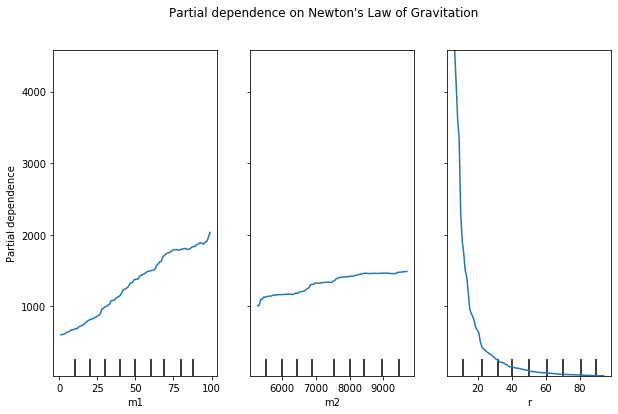

In [9]:
# Plotting Partial Dependence
fig = plt.gcf()
fig.set_size_inches(10, 6)
plot_partial_dependence(est, df.iloc[:, :-1], ["m1", "m2", "r"], fig = fig)
fig.suptitle("Partial dependence on Newton's Law of Gravitation")